# [CDAF] Atividade 1

## Nome e matrícula
Nome: Luís Felipe Ramos Ferreira
Matrícula: 2019022553

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [8]:
df: pd.DataFrame = pd.read_excel("data/TrainingSet_2023_02_08.xlsx")
df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L
...,...,...,...,...,...,...,...,...,...
299209,22-23,ZAF1,18/02/2023,Kaizer Chiefs,Golden Arrows,-1,-1,0,D
299210,22-23,ZAF1,18/02/2023,Sekhukhune United,Richards Bay FC,-1,-1,0,D
299211,22-23,ZAF1,18/02/2023,AmaZulu,Tim Sukazi Galaxy,-1,-1,0,D
299212,22-23,ZAF1,19/02/2023,Bloemfontein Celtic,SuperSport United,-1,-1,0,D


In [9]:
# Cleaning up data (a few matches had negative HS and AS)
df = df[(df["HS"] >= 0) & (df["AS"] >= 0)]

# The NG column represents the Number of Goals of the match
df["NG"] = df["HS"] + df["AS"]
df

/tmp/ipykernel_6184/3653738078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NG"] = df["HS"] + df["AS"]


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,NG
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W,1
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W,5
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W,4
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D,4
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L,1
...,...,...,...,...,...,...,...,...,...,...
299203,22-23,ZAF1,04/02/2023,Golden Arrows,Bloemfontein Celtic,1,2,-1,L,3
299204,22-23,ZAF1,04/02/2023,Orlando Pirates,Mamelodi Sundowns,0,1,-1,L,1
299205,22-23,ZAF1,04/02/2023,SuperSport United,Cape Town City FC,2,0,2,W,2
299206,22-23,ZAF1,04/02/2023,Tshakhuma Tsha Madzivhandila,Sekhukhune United,2,0,2,W,2


In [10]:
def plot_hist(values: pd.Series, title: str, xlabel: str, ylabel: str, xticks: int = None) -> None:
    values_description: pd.Series = values.describe()
    if xticks is None:
        xticks = values_description["min"], values_description["max"] + 1
    _, ax = plt.subplots()
    plt.title(title)
    plt.xticks(np.arange(*xticks), labels=np.arange(*xticks))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.hist(values, bins=np.arange(*xticks), alpha=0.5, edgecolor="black", linewidth=1.2, align="left")
    plt.text(0.75, 0.75, f"min = {values_description['min']}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))
    plt.text(0.75, 0.65, f"max = {values_description['max']}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))
    plt.text(0.75, 0.55, f"mean = {round(values.describe()['mean'], 3)}",transform=ax.transAxes, bbox=dict(facecolor="green", alpha=0.5))

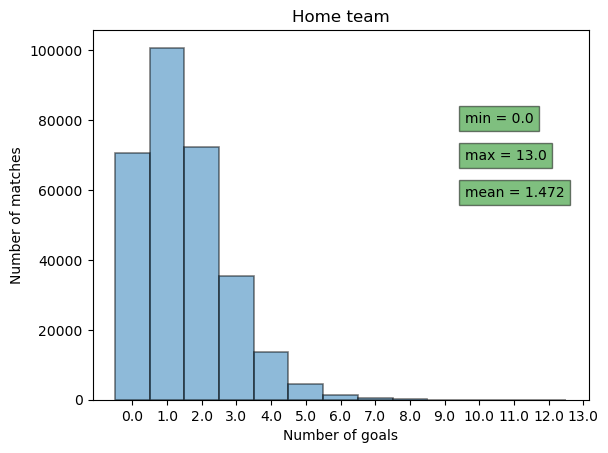

In [11]:
# Home team 
plot_hist(values=df["HS"], title="Home team", xlabel="Number of goals", ylabel="Number of matches")

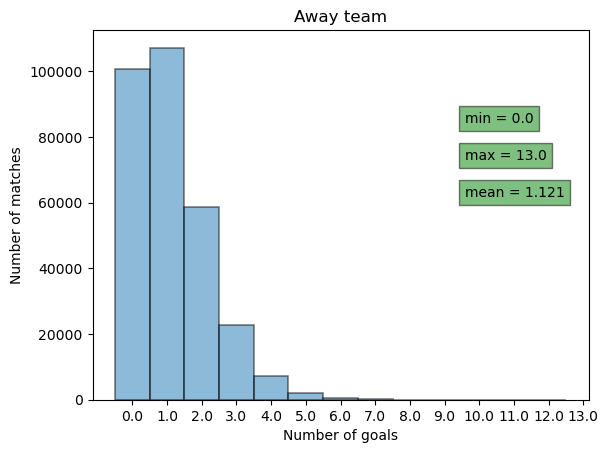

In [12]:
# Away team
plot_hist(values=df["AS"], title="Away team", xlabel="Number of goals", ylabel="Number of matches")

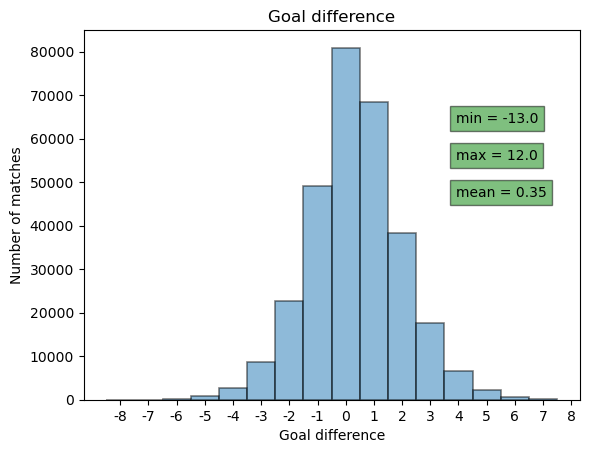

In [13]:
# Goal difference
# xticks was set to a smaller range of numbers for better visualization
plot_hist(values=df["GD"], title="Goal difference", xlabel="Goal difference", ylabel="Number of matches", xticks=(-8, 9))

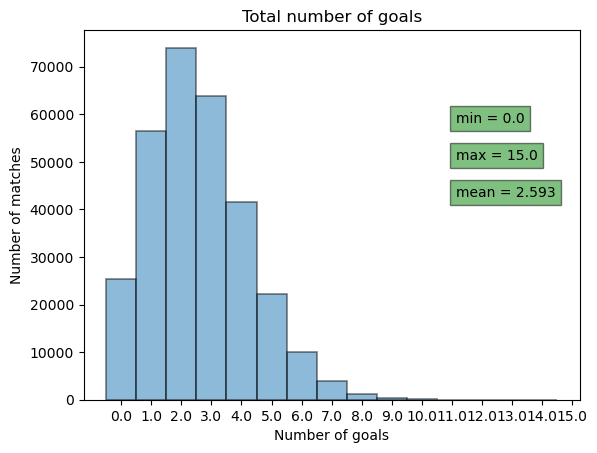

In [14]:
# Number of goals
plot_hist(values=df["NG"], title="Total number of goals", xlabel="Number of goals", ylabel="Number of matches")

## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

In [15]:
# Choosen league: Bra1 , Season 22-23
bra1_df: pd.DataFrame = df[(df["Lge"] == "BRA1") & (df["Sea"] == "22-23")]
bra1_df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,NG
242680,22-23,BRA1,09/04/2022,Fluminense Rio de Janeiro,Santos FC,0,0,0,D,0
242681,22-23,BRA1,09/04/2022,Atletico Clube Goianiense,Flamengo Rio de Janeiro,1,1,0,D,2
242682,22-23,BRA1,10/04/2022,Sociedade Esportiva Palmeiras,Ceara SC,2,3,-1,L,5
242683,22-23,BRA1,10/04/2022,Coritiba FC,Goias Esporte Clube,3,0,3,W,3
242684,22-23,BRA1,10/04/2022,Atletico Mineiro,Internacional,2,0,2,W,2
...,...,...,...,...,...,...,...,...,...,...
243055,22-23,BRA1,13/11/2022,Corinthians Paulista,Atletico Mineiro,0,1,-1,L,1
243056,22-23,BRA1,13/11/2022,Cuiaba Esporte Clube,Coritiba FC,2,1,1,W,3
243057,22-23,BRA1,13/11/2022,Goias Esporte Clube,Sao Paulo FC,0,4,-4,L,4
243058,22-23,BRA1,13/11/2022,Internacional,Sociedade Esportiva Palmeiras,3,0,3,W,3


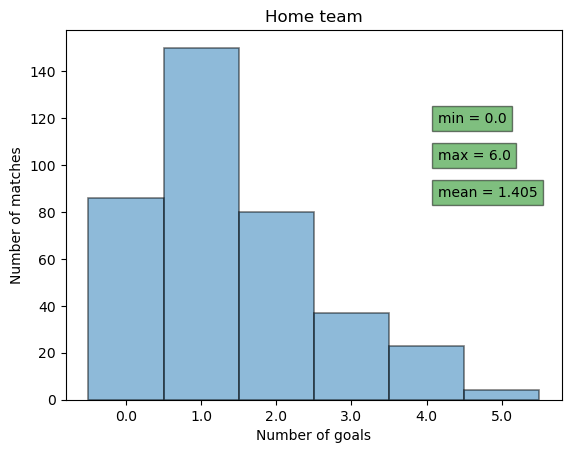

In [16]:
# Home team 
plot_hist(values=bra1_df["HS"], title="Home team", xlabel="Number of goals", ylabel="Number of matches")

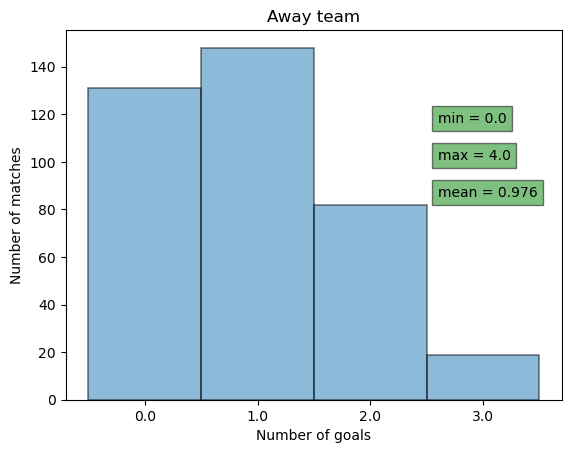

In [17]:
# Away team 
plot_hist(values=bra1_df["AS"], title="Away team", xlabel="Number of goals", ylabel="Number of matches")

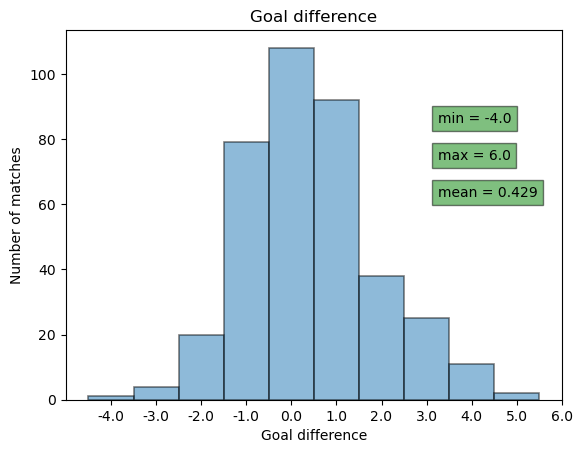

In [18]:
# Goal difference
plot_hist(values=bra1_df["GD"], title="Goal difference", xlabel="Goal difference", ylabel="Number of matches")

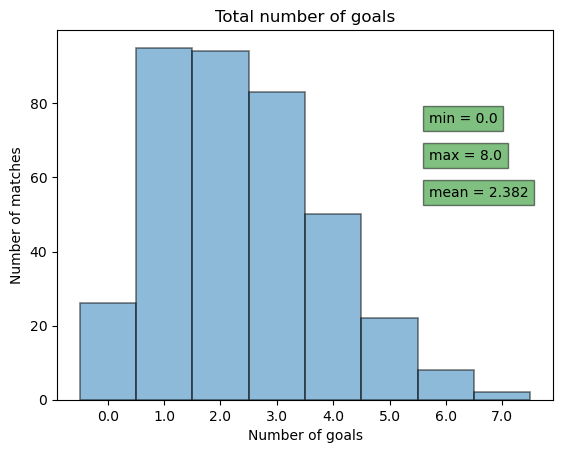

In [19]:
# Number of goals 
plot_hist(values=bra1_df["NG"], title="Total number of goals", xlabel="Number of goals", ylabel="Number of matches")

Comparando ambos os DataFrames (Brasileirão 22-23 e Geral), podemos notar que os histogramas gerados todos seguem distribuições extremanete similares para cada caso. Particularmente, podemos ver que:
- Em média, os times da casa fazem aproximadamente 1.4 gols por partida, em ambas ocasiões. No caso do conjunto geral. podemos notar que o maior número de gols feito por um time jogando em casa foi de 13 gols, enquanto no Brasileirão o maior número de gols feito foi 6. Por outro lado, em ambos os casos o menor número de gols feito pelo time da casa foi 0, o que é esperado, já que não marcar gols jogando em casa é um evento comum. Em relação ao número de gols médio, podemos inferir que a qualidade ofensiva do time jogando em casa não se alterou para o caso específico do Brasileirão 22-23. Ou seja, ela seguiu um padrão esperado visto nas outras ligas.
- Em relação aos gols feitos pelo time visitante, a média para o caso geral é aproximadamente 1.12 gols por jogo, enquanto para o Brasileirão 22-23 a média foi de aproximadamente 0.98. Diversos fatores podem explicar esse dado, mas uma análise exploratória mais detalhada é necessária para ter certeza das afirmações. No entanto, pode-se inferir que no Brasil alguns elementos do jogo fora de casa interferem mais na qualidade ofensiva dos times. Deve ser levado em consideração: pressão de torcida, qualidade dos gramados, condições de jogo, etc. Dessa maneira, notamos então que na temporada 22-23 do Brasileirão os times tiveram um desempenho abaixo do caso geral quando jogando fora de casa.
- Sobre as diferenças de gols, notamos que a média para o Brasileirão 22-23 (aproximadamente 0.43) é superior à média para o caso geral (aproximadamente 0.35). Em primeiro lugar, evidencia-se um fator que parece ser trivial para o senso comum: times que jogam em casa tem mais chance de vencer. O fato da média da diferença de gols ser um número positivo concretiza esse fato. No Brasil, vemos um valor médio um pouco maior, o que indica que os times mandantes na temporada do Brasileirão de 22-23 tiveram melhor desempenho que o geral quando analisamos o fator "casa", tanto fazendo mais gols, quanto levando menos gols. Esse dado se relaciona diretamente com a média de gols feitos pelo time visitante, discutido anteriormente. Como vimos, jogando fora de casa os times do Brasileirão tiveram um desempenho abaixo do geral, demonstrando o maior peso que o fator casa gerou para essa temporada em específico.
- Sobre a quantidade total de gols, observa-se que, no caso geral, a média por partida é um pouco maior por volta de 0.22 gols por partida. Isso pode indicar vários atributos, dentre eles, num caso geral, que o estilo de jogo não seja tão truncado como no Brasil, permitindo mais gols. No entanto, apenas esse dado não proveu muitas informações acerca da liga escolhida em relação ao todo.

## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

In [20]:
# Function to calculate table for any League in any season
def calc_league_table(matches_df: pd.DataFrame, lge: str, sea: str) -> pd.DataFrame:
    df: pd.DataFrame = matches_df[(matches_df["Lge"] == lge) & (matches_df["Sea"] == sea)]
    table_df: pd.DataFrame = pd.DataFrame(columns=["Club", "Played", "Won", "Drawn", "Lost", "GF", "GA", "GD", "Points"])
    for team in df["HT"].unique():
        aux_df: pd.DataFrame = df[(df["HT"] == team) | (df["AT"] == team)]
        won: int = len(aux_df[((aux_df["WDL"] == "W") & (aux_df["HT"] == team)) | ((aux_df["WDL"] == "L") & (aux_df["AT"] == team))])
        played: int = len(aux_df)
        drawn: int = len(aux_df[aux_df["WDL"] == "D"])
        lost: int = played - won - drawn
        gf: int = aux_df[aux_df["HT"] == team]["HS"].sum() + aux_df[aux_df["AT"] == team]["AS"].sum()
        ga: int = aux_df[aux_df["HT"] == team]["AS"].sum() + aux_df[aux_df["AT"] == team]["HS"].sum()
        gd: int = gf - ga
        points: int = won * 3 + drawn * 1
        table_df = pd.concat([table_df, pd.DataFrame(data=[{"Club": team, "Played": played, "Won": won, "Drawn": drawn, "Lost": lost, "GF": gf, "GA": ga, "GD": gd, "Points": points}])])
    table_df = table_df.sort_values(by=["Points", "Won", "GD", "GF"], ascending=False)
    table_df.reset_index(drop=True, inplace=True)
    return table_df

In [21]:
# whole season
bra1_table_df: pd.DataFrame = calc_league_table(matches_df=df, lge="BRA1", sea="22-23")
bra1_table_df

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Sociedade Esportiva Palmeiras,38,23,12,3,66,27,39,81
1,Internacional,38,20,13,5,58,31,27,73
2,Fluminense Rio de Janeiro,38,21,7,10,63,41,22,70
3,Corinthians Paulista,38,18,11,9,44,36,8,65
4,Flamengo Rio de Janeiro,38,18,8,12,60,39,21,62
5,Atletico Paranaense,38,16,10,12,48,48,0,58
6,Atletico Mineiro,38,15,13,10,45,37,8,58
7,Fortaleza,38,15,10,13,46,39,7,55
8,Sao Paulo FC,38,13,15,10,55,42,13,54
9,America MG,38,15,8,15,40,40,0,53


In [110]:
def calc_1st_half_league_table(matches_df: pd.DataFrame, lge: str, sea: str) -> pd.DataFrame:
    df: pd.DataFrame = matches_df[(matches_df["Lge"] == lge) & (matches_df["Sea"] == sea)]
    df = df.sort_values(by=["Date"]).head(int(len(df) / 2))
    table_df: pd.DataFrame = pd.DataFrame(columns=["Club", "Played", "Won", "Drawn", "Lost", "GF", "GA", "GD", "Points"])
    for team in df["HT"].unique():
        aux_df: pd.DataFrame = df[(df["HT"] == team) | (df["AT"] == team)]
        won: int = len(aux_df[((aux_df["WDL"] == "W") & (aux_df["HT"] == team)) | ((aux_df["WDL"] == "L") & (aux_df["AT"] == team))])
        played: int = len(aux_df)
        drawn: int = len(aux_df[aux_df["WDL"] == "D"])
        lost: int = played - won - drawn
        gf: int = aux_df[aux_df["HT"] == team]["HS"].sum() + aux_df[aux_df["AT"] == team]["AS"].sum()
        ga: int = aux_df[aux_df["HT"] == team]["AS"].sum() + aux_df[aux_df["AT"] == team]["HS"].sum()
        gd: int = gf - ga
        points: int = won * 3 + drawn * 1
        table_df = pd.concat([table_df, pd.DataFrame(data=[{"Club": team, "Played": played, "Won": won, "Drawn": drawn, "Lost": lost, "GF": gf, "GA": ga, "GD": gd, "Points": points}])])
    table_df = table_df.sort_values(by=["Points", "Won", "GD", "GF"], ascending=False)
    table_df.reset_index(drop=True, inplace=True)
    return table_df

In [111]:
# first season half
bra1_1st_half_table_df: pd.DataFrame = calc_1st_half_league_table(matches_df=df, lge="BRA1", sea="22-23")
bra1_1st_half_table_df

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Internacional,20,10,7,3,28,16,12,37
1,Sociedade Esportiva Palmeiras,19,10,6,3,34,16,18,36
2,Corinthians Paulista,20,10,6,4,26,20,6,36
3,Atletico Mineiro,20,9,7,4,28,19,9,34
4,America MG,18,10,2,6,21,14,7,32
5,Atletico Paranaense,18,8,5,5,25,25,0,29
6,Sao Paulo FC,18,7,7,4,26,17,9,28
7,Fluminense Rio de Janeiro,19,8,3,8,28,26,2,27
8,Fortaleza,20,7,6,7,24,19,5,27
9,Coritiba FC,18,7,4,7,23,25,-2,25


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

In [22]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn
from scipy.stats import poisson, skellam

In [23]:
goal_model_data: pd.DataFrame = pd.concat([bra1_df[["HT", "AT", "HS"]].assign(home=1).rename(columns={"HT": "team", "AT": "opponent", "HS": "goals"}), bra1_df[["HT", "AT", "AS"]].assign(home=0).rename(columns={"HT": "opponent", "AT": "team", "AS": "goals"})])
goal_model_data

,team,opponent,goals,home
242680,Fluminense Rio de Janeiro,Santos FC,0,1
242681,Atletico Clube Goianiense,Flamengo Rio de Janeiro,1,1
242682,Sociedade Esportiva Palmeiras,Ceara SC,2,1
242683,Coritiba FC,Goias Esporte Clube,3,1
242684,Atletico Mineiro,Internacional,2,1
...,...,...,...,...
243055,Atletico Mineiro,Corinthians Paulista,1,0
243056,Coritiba FC,Cuiaba Esporte Clube,1,0
243057,Sao Paulo FC,Goias Esporte Clube,4,0
243058,Sociedade Esportiva Palmeiras,Internacional,0,0


In [24]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -995.50
Date:                Sun, 09 Apr 2023   Deviance:                       714.27
Time:                        22:01:03   Pearson chi2:                     602.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1481
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.2818      0.230     -1.226      0.220      -0.732       0.169
team[T.Atletico Clube Goianiense]            -0.0056      0.225     -0.025      0.980      -0.447       0.436
team[T.Atletico Mineiro]                      0.1146      0.218      0.527      0.598      -0.312       0.541
team[T.Atletico Paranaense]                   0.1921      0.214      0.896      0.370      -0.228       0.612
team[T.Avai FC]                              -0.1397      0.234     -0.598      0.550      -0.597       0.318
team[T.Botafogo Rio de Janeiro]               0.0282      0.222      0.127      0.899      -0.408       0.464
team[T.Bragantino]                            0.2259      0.213      1.058      0.290      -0.192       0.644
team[T.Ceara SC]                             -0.1617      0.233     -0.692      0.489      -0.619       0.296
team[T.Corinthians Paulista]                  0.0909      0.219      0.416      0.678      -0.338       0.520
team[T.Coritiba FC]                          -0.0021      0.225     -0.009      0.993      -0.444       0.440
team[T.Cuiaba Esporte Clube]                 -0.2531      0.240     -1.057      0.291      -0.723       0.216
team[T.Esporte Clube Juventude]              -0.2886      0.244     -1.182      0.237      -0.767       0.190
team[T.Flamengo Rio de Janeiro]               0.4054      0.204      1.983      0.047       0.005       0.806
team[T.Fluminense Rio de Janeiro]             0.4567      0.202      2.256      0.024       0.060       0.853
team[T.Fortaleza]                             0.1389      0.216      0.642      0.521      -0.285       0.563
team[T.Goias Esporte Clube]                   0.0151      0.224      0.067      0.946      -0.424       0.454
team[T.Internacional]                         0.3620      0.206      1.759      0.079      -0.041       0.765
team[T.Santos FC]                             0.0967      0.219      0.442      0.658      -0.332       0.525
team[T.Sao Paulo FC]                          0.3216      0.208      1.546      0.122      -0.086       0.729
team[T.Sociedade Esportiva Palmeiras]         0.4868      0.201      2.427      0.015       0.094       0.880
opponent[T.Atletico Clube Goianiense]         0.3539      0.207      1.714      0.087      -0.051       0.759
opponent[T.Atletico Mineiro]                 -0.0724      0.228     -0.317      0.751      -0.520       0.375
opponent[T.Atletico Paranaense]               0.1921      0.214      0.896      0.370      -0.228       0.612
opponent[T.Avai FC]                           0.3995      0.204      1.955      0.051      -0.001       0.800
opponent[T.Botafogo Rio de Janeiro]           0.0736      0.220      0.335      0.738      -0.357       0.505
opp

In [25]:
# simulating Palmeiras (1st place) vs Corinthians (4th place)
home_team: str = "Sociedade Esportiva Palmeiras"
away_team: str = "Corinthians Paulista"

home_score_rate: pd.Series = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                    'home':1}, index=[1]))
away_score_rate: pd.Series = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                    'home':0}, index=[1]))

print(home_team + ' against ' + away_team + ' expect to score: ' + str(round(home_score_rate[1], 3)))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(round(away_score_rate[1], 3)))

home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Sociedade Esportiva Palmeiras against Corinthians Paulista expect to score: 1.597
Corinthians Paulista against Sociedade Esportiva Palmeiras expect to score: 0.574
Sociedade Esportiva Palmeiras: 2
Corinthians Paulista: 0


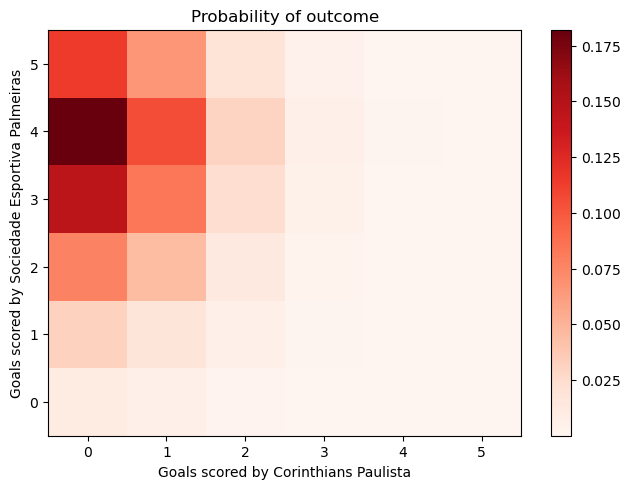

In [26]:
# Código copiado do Soccermatics
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?

In [28]:
def simulate_match_result(home_team: str, away_team: str) -> tuple[int]:
    home_score_rate: pd.Series = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                    'home':1}, index=[1]))
    away_score_rate: pd.Series = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                    'home':0}, index=[1]))
    return round(home_score_rate[1], 3), round(away_score_rate[1], 3)

In [52]:
simulated_games_df: pd.DataFrame = pd.DataFrame(columns=["HT", "AT", "expected_HS", "expected_AS", "expected_GD", "WDL"])

# we consider the team in the first position of the tuple to be playing at home
all_matches: np.array =  np.asarray(list(itertools.permutations(list(bra1_df["HT"].unique()), 2)))
for match in all_matches:
    home_team, away_team = match
    team_expected_goals, opponent_expected_gols = simulate_match_result(home_team=home_team, away_team=away_team)
    expected_goal_difference: float = team_expected_goals - opponent_expected_gols
    WDL: str = "D" if abs(expected_goal_difference) < 0.5 else "W" if expected_goal_difference > 0 else "L"
    simulated_games_df = pd.concat([simulated_games_df, pd.DataFrame(data=[{"HT": home_team, "AT": away_team, "expected_HS": team_expected_goals, "expected_AS": opponent_expected_gols, "expected_GD": expected_goal_difference, "WDL": WDL}])])

In [53]:
def calc_expected_table(df: pd.DataFrame) -> pd.DataFrame:
    table_df: pd.DataFrame = pd.DataFrame(columns=["Club", "Played", "Won", "Drawn", "Lost", "GF", "GA", "GD", "Points"])
    for team in df["HT"].unique():
        aux_df: pd.DataFrame = df[(df["HT"] == team) | (df["AT"] == team)]
        won: int = len(aux_df[((aux_df["WDL"] == "W") & (aux_df["HT"] == team)) | ((aux_df["WDL"] == "L") & (aux_df["AT"] == team))])
        played: int = len(aux_df)
        drawn: int = len(aux_df[aux_df["WDL"] == "D"])
        lost: int = played - won - drawn
        gf: int = aux_df[aux_df["HT"] == team]["expected_HS"].sum() + aux_df[aux_df["AT"] == team]["expected_AS"].sum()
        ga: int = aux_df[aux_df["HT"] == team]["expected_AS"].sum() + aux_df[aux_df["AT"] == team]["expected_HS"].sum()
        gd: int = gf - ga
        points: int = won * 3 + drawn * 1
        table_df = pd.concat([table_df, pd.DataFrame(data=[{"Club": team, "Played": played, "Won": won, "Drawn": drawn, "Lost": lost, "GF": gf, "GA": ga, "GD": gd, "Points": points}])])
    table_df = table_df.sort_values(by=["Points", "Won", "GD", "GF"], ascending=False)
    table_df.reset_index(drop=True, inplace=True)
    return table_df

In [54]:
simulated_table_df: pd.DataFrame = calc_expected_table(simulated_games_df)
simulated_table_df

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Sociedade Esportiva Palmeiras,38,29,9,0,66.003,26.998,39.005,96
1,Internacional,38,24,13,1,58.002,31.001,27.001,85
2,Fluminense Rio de Janeiro,38,21,14,3,63.001,41.002,21.999,77
3,Flamengo Rio de Janeiro,38,21,14,3,60.001,38.999,21.002,77
4,Sao Paulo FC,38,15,19,4,55.000,41.998,13.002,64
5,Atletico Mineiro,38,12,22,4,45.002,37.001,8.001,58
6,Corinthians Paulista,38,12,22,4,44.000,36.002,7.998,58
7,Fortaleza,38,12,21,5,46.000,39.000,7.000,57
8,Santos FC,38,10,23,5,43.999,41.001,2.998,53
9,Atletico Paranaense,38,9,19,10,47.999,48.000,-0.001,46


In [48]:
from IPython.display import display_html
bra1_table_df_styler = bra1_table_df.style.set_table_attributes("style='display:inline'").set_caption("Tabela oficial")
simulated_table_df_styler = simulated_table_df.style.set_table_attributes("style='display:inline'").set_caption("Tabela simulada")

display_html(bra1_table_df_styler._repr_html_() + simulated_table_df_styler._repr_html_(), raw=True)

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Sociedade Esportiva Palmeiras,38,23,12,3,66,27,39,81
1,Internacional,38,20,13,5,58,31,27,73
2,Fluminense Rio de Janeiro,38,21,7,10,63,41,22,70
3,Corinthians Paulista,38,18,11,9,44,36,8,65
4,Flamengo Rio de Janeiro,38,18,8,12,60,39,21,62
5,Atletico Paranaense,38,16,10,12,48,48,0,58
6,Atletico Mineiro,38,15,13,10,45,37,8,58
7,Fortaleza,38,15,10,13,46,39,7,55
8,Sao Paulo FC,38,13,15,10,55,42,13,54
9,America MG,38,15,8,15,40,40,0,53


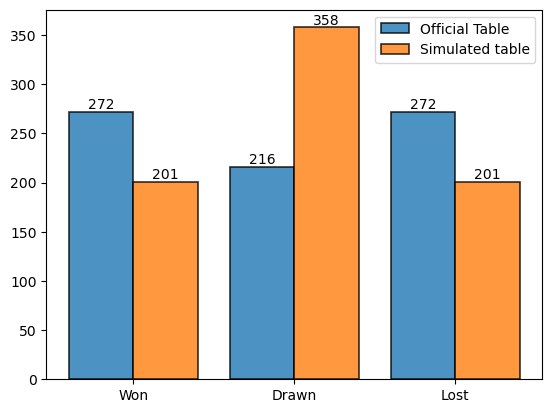

In [92]:
# plotting differences in results
plt.xticks(np.arange(3), ["Won", "Drawn", "Lost"])
bar_rects_official = plt.bar(np.arange(3) - 0.2, bra1_table_df[["Won", "Drawn", "Lost"]].sum(), width=0.4, label="Official Table", linewidth=1.2, alpha=0.8, edgecolor="black")
bar_rects_simulated = plt.bar(np.arange(3) + 0.2, simulated_table_df[["Won", "Drawn", "Lost"]].sum(), width=0.4, label="Simulated table", linewidth=1.2, alpha=0.8, edgecolor="black")
plt.legend()
for rect in bar_rects_official:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')
for rect in bar_rects_simulated:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')



A primeira impressão que tem-se ao comparar as duas tabelas é a de que a simulação teve um desempenho consideravelmente bom em predizer as posições finais dos times no campeonato. Os três primeiros colocados, assim como os dois últimos, por exemplo, foram previstos perfeitamente.  De forma geral, quando erradas, as posições estimadas para alguns clubes estão bem próximas da realidade. Portanto, em relação à colocações no campeonato, o modelo teve um bom desepenho de predição, mas não sem defeitos.

Um ponto a se destacar é que, devido à forma como o modelo de Poisson funciona, a predição para o total de gols feitos e gols tomados no campeonato é basicamente a mesma, a menos de pequenos erros numéricos. 

Agora, um ponto em que o modelo comete muitos erros (e pode ser visto no gráfico de barras acima) é a proporção de vitórias, derrotas e empates para cada time, assim como do campeonato no geral. Na forma como foi feito, ele prevê uma quantidade muito grande de vitórias e muito pequena de derrotas para os times na parte de cima da tabela, e vice-versa para os times da parte de baixo. O campeão Palmeiras, por exemplo, teve 23 vitórias e 3 derrotas ao decorrer da temporada, mas na simulação obteve 29, enquanto não perdeu uma partida sequer. O último colocado, Juventude, perder 22 partidas e venceu 3 na temporada, enquanto na simulação não venceu nenhuma e perder 29.

Seguindo esta mesma linha de raciocínio, nota-se que a simulação preveu um número consideravelmente maior de empates na temporada. Quase o dobro de empates de empates foi previsto pelo modelo. Talvez, alterando o valor de diferença de gols que interprete-se como emmpate do modelo preditivo, tenha-se um valor mais aproximado da realidade. No entanto, considerando que jogos com uma diferença esperada de gols menor que 0.5 como empate, tivemos essa grande diferença com o que realmente aconteceu.

Em resumo, podemos dizer que o modelo superestima times que vão bem no campeonato, subestima os que vão mal, e prediz um número muito maior do que o normal de empates. No entanto, deve-se salientar de que se trata de um modelo simples com poucas features de análise e poucos dados de treino que, apesar de tudo, teve um bom desempenho em prever ao final as posições dos primeiros e últimos colocados, e esteve "pŕoximo" de acertar todas as posições finais no campeonato.
